# Memory agent vs memoryless agent

In [1]:
import numpy as np

from engine import RMG
from agent import RandomAgent, IndQLearningAgent, FPLearningAgent, Mem1FPLearningAgent,TFT

## Mem-1 versus TFT player

In [21]:
N_EXP = 10

r0ss_mem1 = []
r1ss_tft = []

In [22]:
for n in range(N_EXP):

    batch_size = 1
    max_steps = 20
    gamma = 0.96

    # Reward matrix for the Iterated Prisoner's Dilemma
    ipd_rewards = np.array([[-1., 0.], [-3., -2.]])

    env = RMG(max_steps=max_steps, payouts=ipd_rewards, batch_size=batch_size)
    env.reset()

    possible_actions = [0, 1]  # Cooperate or Defect

    #p0, p1 = TFT(possible_actions),TFT(possible_actions)

    p0, p1 = Mem1FPLearningAgent(possible_actions, possible_actions,
                                n_states=1, learning_rate=0.05, epsilon=0.1, gamma=gamma), TFT(possible_actions)

    #adversary, dm = IndQLearningAgent(possible_actions, n_states=1, learning_rate=0.05, epsilon=0.1, gamma=gamma), \
    #    FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.05, epsilon=0.1, gamma=gamma)


    #p0, p1 = FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.05, epsilon=0.1, gamma=ga#mma), \
    #    FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.05, epsilon=0.1, gamma=gamma)




    n_iter = 1000

    r0s = []
    r1s = []

    a0s = []
    a1s = []

    a0_prev = None
    a1_prev = None

    # State = Memory

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide

            #a0 = p0.act()
            #a1 = p1.act()

            a0 = p0.act( (a0_prev,a1_prev) )
            a1 = p1.act( (a1_prev,a0_prev) )

            # World changes
            _, (r0, r1), done, _ = env.step(([a0], [a1]))

            # Agents learn

            p0.update((a0_prev, a1_prev), (a0, a1), (r0, r1), (a0,a1) )
            p1.update((a1_prev, a0_prev), (a1, a0), (r1, r0), (a1,a0) )

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(r0[0])
            r1s.append(r1[0])

            a0s.append(a0)
            a1s.append(a1)



            a0_prev = a0
            a1_prev = a1


        env.reset()
    print(n)
    r0ss_mem1.append(r0s)
    r1ss_tft.append(r1s)

0
1
2
3
4
5
6
7
8
9


## Memoryless FP-Player vs TFT player

In [16]:
N_EXP = 10

r0ss_fp = []
r1ss_tft2 = []

In [17]:
for n in range(N_EXP):

    batch_size = 1
    max_steps = 20
    gamma = 0.96

    # Reward matrix for the Iterated Prisoner's Dilemma
    ipd_rewards = np.array([[-1., 0.], [-3., -2.]])

    env = RMG(max_steps=max_steps, payouts=ipd_rewards, batch_size=batch_size)
    env.reset()

    possible_actions = [0, 1]  # Cooperate or Defect

    #p0, p1 = TFT(possible_actions),TFT(possible_actions)

    p0, p1 = FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.05, 
                             epsilon=0.1, gamma=gamma), \
            TFT(possible_actions)

    #adversary, dm = IndQLearningAgent(possible_actions, n_states=1, learning_rate=0.05, epsilon=0.1, gamma=gamma), \
    #    FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.05, epsilon=0.1, gamma=gamma)


    #p0, p1 = FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.05, epsilon=0.1, gamma=ga#mma), \
    #    FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.05, epsilon=0.1, gamma=gamma)




    n_iter = 1000

    r0s = []
    r1s = []

    a0s = []
    a1s = []

    a0_prev = None
    a1_prev = None
    

    # State = Memory
    s=0

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide

            a0 = p0.act()
            #a1 = p1.act()

            #a0 = p0.act( (a0_prev,a1_prev) )
            a1 = p1.act( (a1_prev,a0_prev) )

            # World changes
            _, (r0, r1), done, _ = env.step(([a0], [a1]))

            # Agents learn

            p0.update(s, (a0, a1), (r0, r1), s )
            #p0.update((a0_prev, a1_prev), (a0, a1), (r0, r1), (a0,a1) )
            p1.update((a1_prev, a0_prev), (a1, a0), (r1, r0), (a1,a0) )

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(r0[0])
            r1s.append(r1[0])

            a0s.append(a0)
            a1s.append(a1)



            a0_prev = a0
            a1_prev = a1


        env.reset()
    print(n)
    r0ss_fp.append(r0s)
    r1ss_tft2.append(r1s)

0
1
2
3
4
5
6
7
8
9


In [18]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

We report moving avearage of rewards, since it's common in RL taks

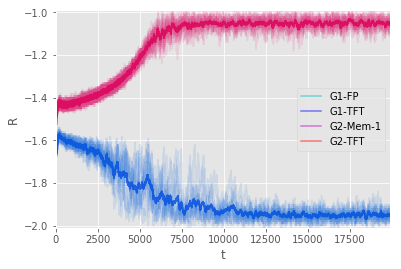

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')

plt.axis([0, max_steps*n_iter, -3.5, 0.5])

    
plt.plot(moving_average(np.asarray(r0ss_fp).mean(axis=0), 100), 'c', alpha=0.5)
plt.plot(moving_average(np.asarray(r1ss_tft2).mean(axis=0), 100), 'b', alpha=0.5)
plt.plot(moving_average(np.asarray(r0ss_mem1).mean(axis=0), 100), 'm', alpha=0.5)
plt.plot(moving_average(np.asarray(r1ss_tft).mean(axis=0), 100), 'r', alpha=0.5)

for i in range(N_EXP):
    plt.plot(moving_average(r0ss_fp[i], 100), 'c', alpha=0.05)
    plt.plot(moving_average(r1ss_tft2[i], 100), 'b', alpha=0.05)
    plt.plot(moving_average(r0ss_mem1[i], 100), 'r', alpha=0.05)
    plt.plot(moving_average(r1ss_tft[i], 100), 'm', alpha=0.05)

plt.xlabel('t');
plt.ylabel('R');

plt.autoscale(tight=True)

plt.legend(['G1-FP', 'G1-TFT', 'G2-Mem-1', 'G2-TFT']);

plt.savefig('img/MemvsTFT.png')